In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from numpy import random
from sklearn import utils
from sklearn.model_selection import KFold

In [ ]:
training_set = pd.read_csv('train_set.csv')
test_set = pd.read_csv('test_set.csv')

In [ ]:
training_set.head(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,target
0,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,24.4
1,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88,12.8
2,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34,20.6
3,0.05302,0.0,3.41,0.0,0.489,7.079,63.1,3.4145,2.0,270.0,17.8,396.06,5.70,28.7
4,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,25.3


In [ ]:
X_train = np.array(training_set.iloc[:,0:-1])
y_train = np.array(training_set[['target']])

In [ ]:
X_test = np.array(test_set)
X_test.shape

(100, 13)

In [ ]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)


In [ ]:
def train_model(degrees, alph,n_iter=10,n_split=5):
  scores=[]
  train_score=[]
  random.seed(42)
  if alph !=0:
    reg = linear_model.Ridge(alpha=alph)
  else:
    reg = LinearRegression()  
  for i in range(n_iter):
        X,y=utils.shuffle( X_train_std, y_train)
        #shuffle the dataset
        kf = KFold(n_splits=n_split , random_state=42,shuffle=True)
        for train_index, test_index in kf.split(X):
          X_train_folds = X[train_index]
          y_train_folds = y[train_index]
          X_test_fold = X[test_index]
          y_test_fold = y[test_index]
          poly_features = PolynomialFeatures(degree=degrees, include_bias=False)
          X_poly = poly_features.fit_transform(X_train_folds)
          X_poly_test=poly_features.fit_transform(X_test_fold)

          reg.fit(X_poly,y_train_folds)
          y_predictions = reg.predict(X_poly_test)
          lin_mse = mean_squared_error(y_test_fold, y_predictions)
          y_train_predictions= reg.predict(X_poly)
          mse= mean_squared_error(y_train_folds, y_train_predictions)
          scores.append(lin_mse)
          train_score.append(mse)
  val_mse=np.mean(scores)
  train_mse = np.mean(train_score)
  return scores, reg,train_score,val_mse,train_mse

In [ ]:
s1,reg1,y1,Vmse1,Tmse1= train_model(1,0)
s2,reg2,y2,Vmse2,Tmse2= train_model(1,1)
s3,reg3,y3,Vmse3,Tmse3= train_model(1,10)
s4,reg4,y4,Vmse4,Tmse4= train_model(3,0)
s5,reg5,y5,Vmse5,Tmse5= train_model(3,1)
s6,reg6,y6,Vmse6,Tmse6= train_model(3,10)
s7,reg7,y7,Vmse7,Tmse7= train_model(5,0)
s8,reg8,y8,Vmse8,Tmse8= train_model(5,1)
s9,reg9,y9,Vmse9,Tmse9= train_model(5,10)

In [ ]:
val_scores = [s1,s2,s3,s4,s5,s6,s7,s8,s9]
train_scores = [y1,y2,y3,y4,y5,y6,y7,y8,y9]
labels=["(1,0)","(1,1)","(1,10)","(3,0)","(3,1)","(3,20)","(5,0)","(5,1)","(5,10)"]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff845ba0350>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff845ba0dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff845b90d10>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff845bad8d0>,
 'fliers': [],
 'means': []}

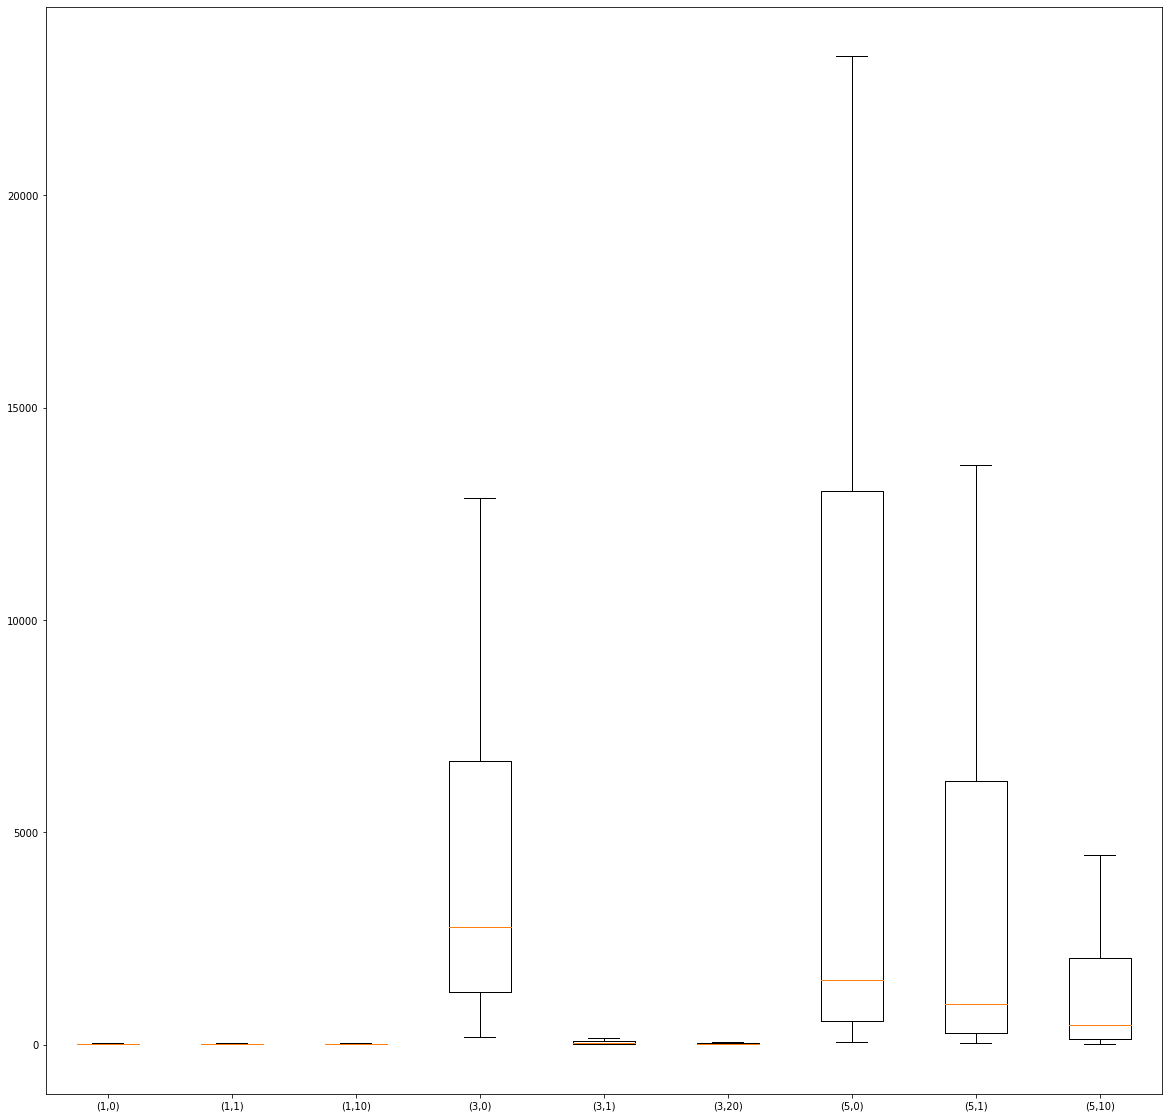

In [ ]:

fig = plt.figure(figsize =(20, 20))
plt.boxplot(val_scores,labels=labels,showfliers=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff8455aed10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff8455b27d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff8455ae7d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff8455ba2d0>,
 'fliers': [],
 'means': []}

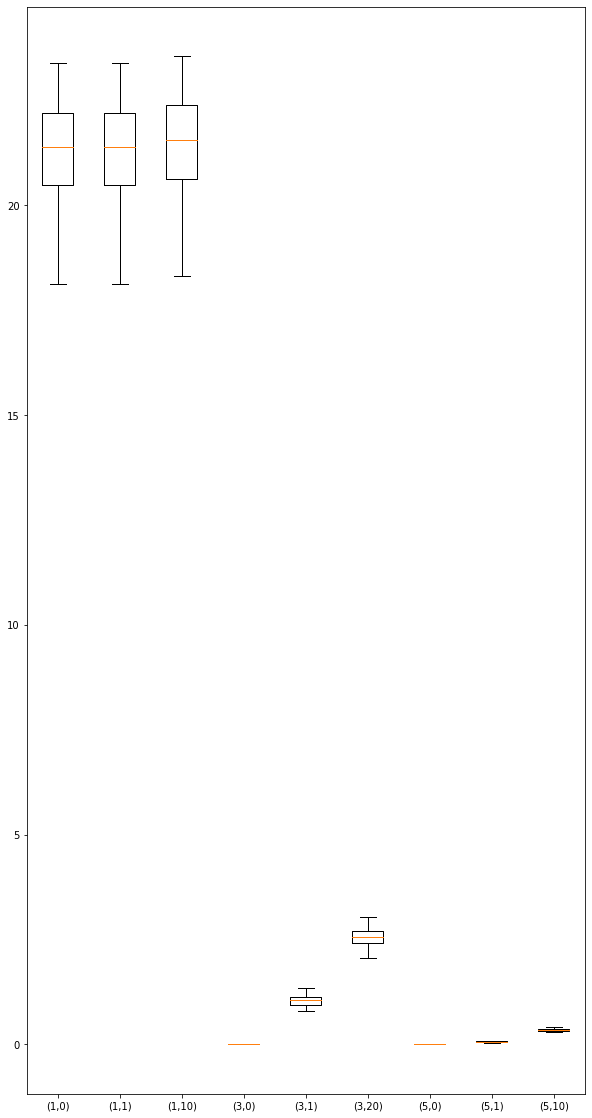

In [ ]:
fig = plt.figure(figsize =(10, 20))
plt.boxplot(x=train_scores,labels=labels,showfliers=False)

In [ ]:
rows =["(degree,alpha) = {} ".format(f) for f in ['(1,0)','(1,1)','(1,10)','(3,0)','(3,1)','(3,10)','(5,0)','(5,1)','(5,10)']]

In [ ]:
columns = ('train_mean_score','validation_mean_score')

In [ ]:
train_mse_= np.vstack((Tmse1,Tmse2,Tmse3,Tmse4,Tmse5,Tmse6,Tmse7,Tmse8,Tmse9))
val_mse_=np.vstack((Vmse1,Vmse2,Vmse3,Vmse4,Vmse5,Vmse6,Vmse7,Vmse8,Vmse9))

In [ ]:
table = np.hstack((train_mse_,val_mse_))

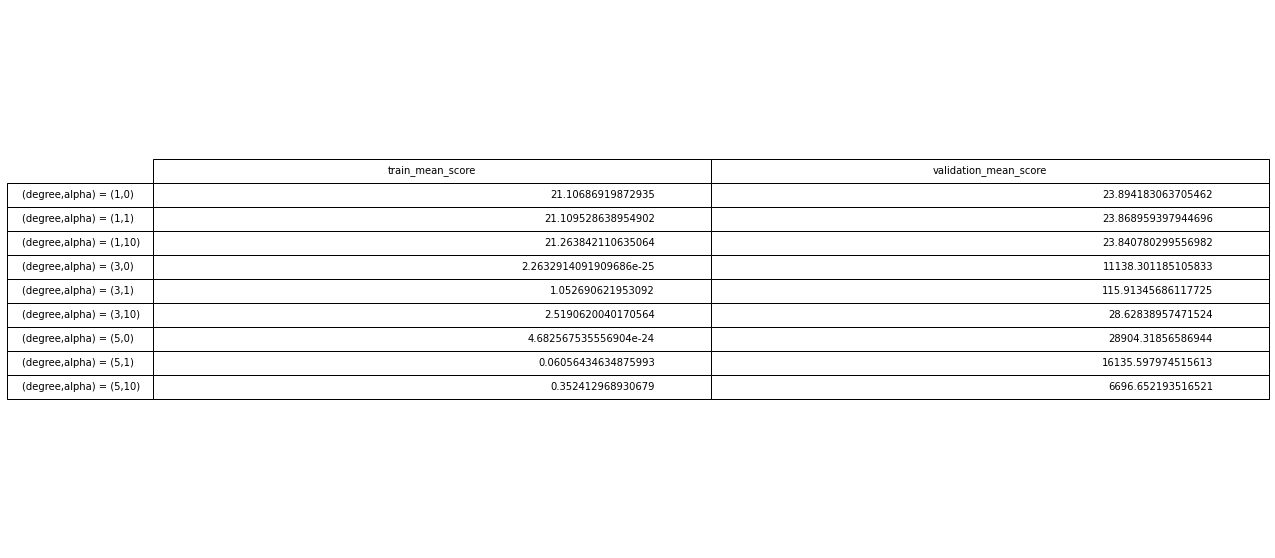

In [ ]:
fig = plt.figure(figsize =(20, 10))
the_table=plt.table(cellText=table, rowLabels=rows,colLabels=columns,loc='center')
plt.box(on=None)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
the_table.scale(1, 2)

In [ ]:
print(Vmse1,Tmse1)

23.894183063705462 21.10686919872935


In [ ]:
val_min = np.min(val_scores,axis=1).reshape(9,1)
train_min = np.min(train_scores,axis=1).reshape(9,1)

In [ ]:
table = np.hstack((train_min,val_min))

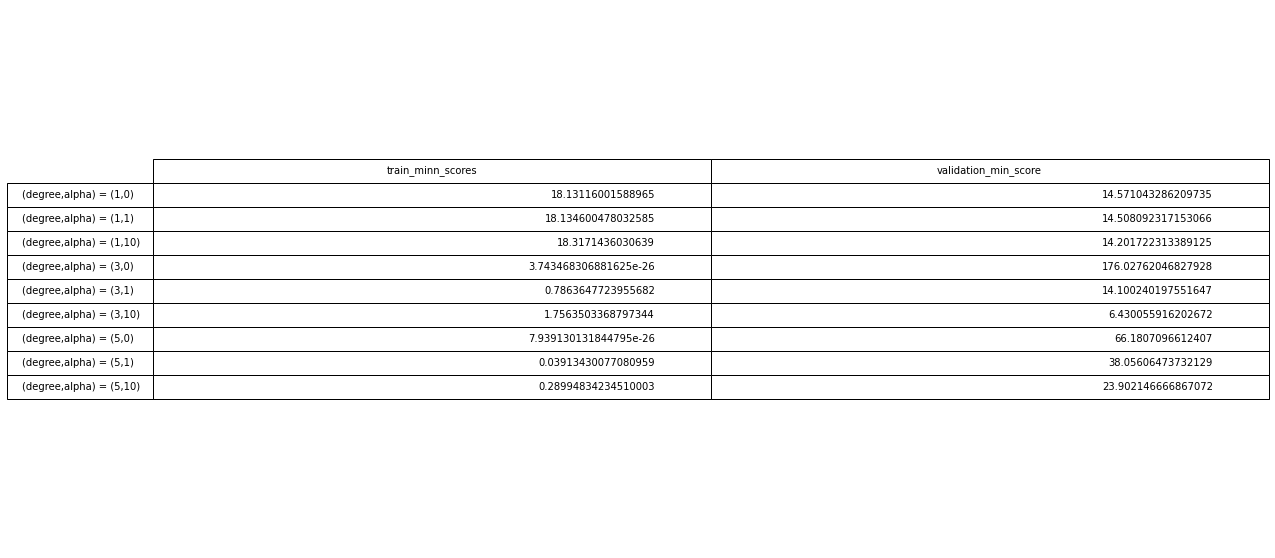

In [ ]:
columns = ('train_minn_scores','validation_min_score')
fig = plt.figure(figsize =(20, 10))
the_table=plt.table(cellText=table, rowLabels=rows,colLabels=columns,loc='center')
plt.box(on=None)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
the_table.scale(1, 2)

In [ ]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_3 = poly_features.fit_transform(X_train_std)
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly_5 = poly_features.fit_transform(X_train_std)


In [ ]:
pred=reg7.predict(X_poly_5)

Text(0.5, 1.0, '(Degree , Alpha) = (5,0)')

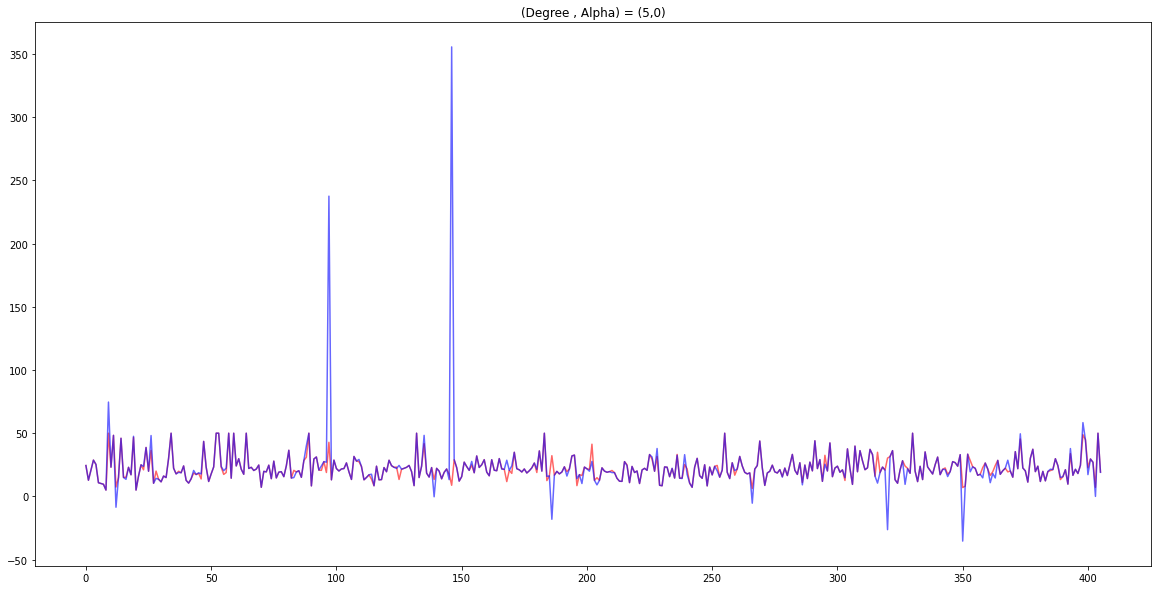

In [ ]:
fig = plt.figure(figsize =(20, 10))
plt.plot(y_train, 'r', label='Y',alpha=0.6)
plt.plot(pred, 'b', label='Y_pred',alpha=0.6)
plt.title("(Degree , Alpha) = (5,0)")

Text(0.5, 1.0, '(Degree , Alpha) = (3,0)')

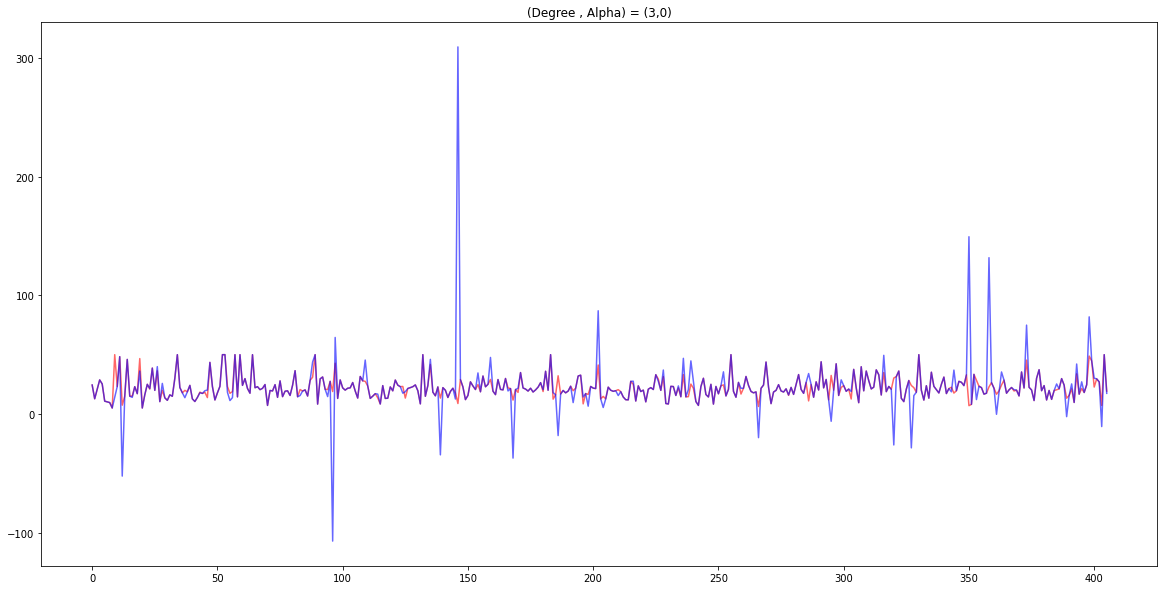

In [ ]:
pred=reg4.predict(X_poly_3)
fig = plt.figure(figsize =(20, 10))
plt.plot(y_train, 'r', label='Y',alpha=0.6)
plt.plot(pred, 'b', label='Y_pred',alpha=0.6)
plt.title("(Degree , Alpha) = (3,0)")

Text(0.5, 1.0, '(Degree , Alpha) = (3,10)')

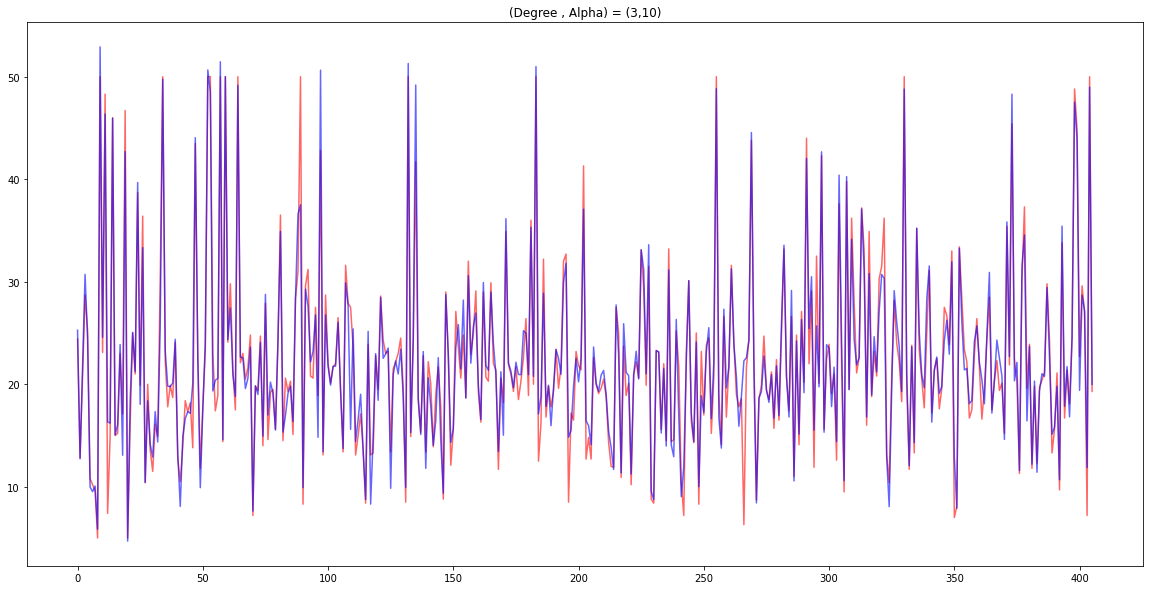

In [ ]:
pred=reg6.predict(X_poly_3)
fig = plt.figure(figsize =(20, 10))
plt.plot(y_train, 'r', label='Y',alpha=0.6)
plt.plot(pred, 'b', label='Y_pred',alpha=0.6)
plt.title("(Degree , Alpha) = (3,10)")

Text(0.5, 1.0, '(Degree , Alpha) = (1,10)')

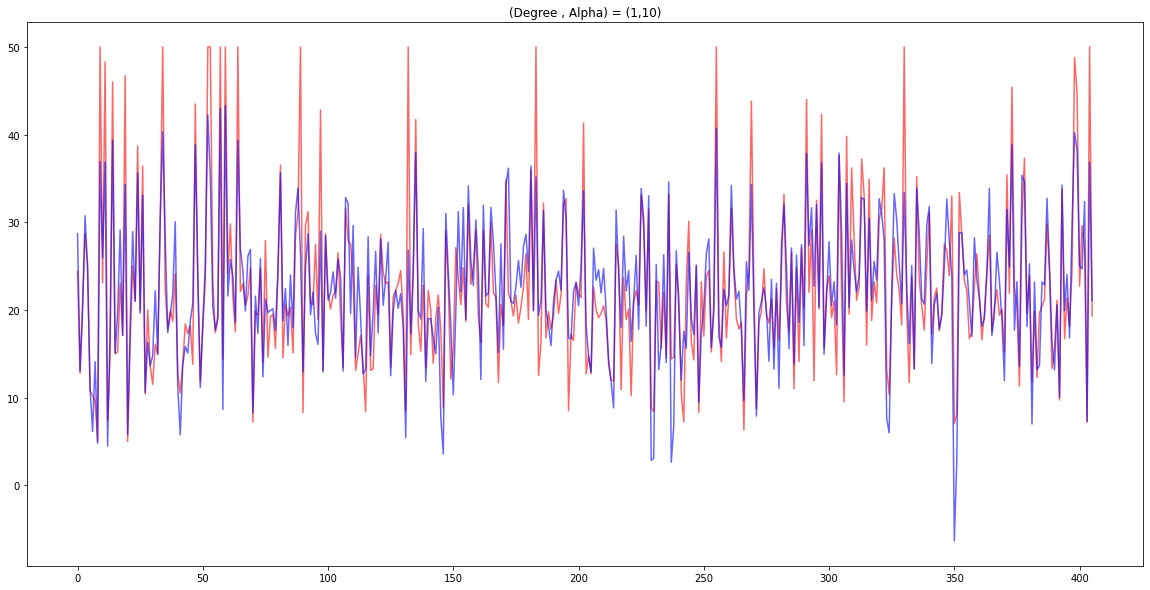

In [ ]:
pred=reg1.predict(X_train_std)
fig = plt.figure(figsize =(20, 10))
plt.plot(y_train, 'r', label='Y',alpha=0.6)
plt.plot(pred, 'b', label='Y_pred',alpha=0.6)
plt.title("(Degree , Alpha) = (1,10)")

In [ ]:
n_sp = [4,5,6]
n_it = [5,10,15]
landa = [x for x in range (0,20,2)]
dgr= [2,3,4]
b_sp = 0
b_it = 0
b_landa = 0
b_dgr = 0
min_mean=100000
min_min =100000
mean_array=[0,0,0,0]
min_array=[0,0,0,0]
for s in n_sp:
  for iter in n_it:
    for lnda in landa:
      for deg in dgr:
        sc,reg,y,Vmse,Tmse= train_model(deg,lnda,iter,s)
        print("n_split : {} , n_iter : {} , landa = {} , degree {}".format(s,iter,lnda,deg))
        print("val mean : {} , train mean {}".format(Vmse,Tmse))
        print("val min {} , train min {}".format(np.min(sc),np.min(y)))
        validation_min = np.min(sc)
        if Vmse < min_mean:
          mean_array[0]=s
          mean_array[1]=iter
          mean_array[2]=lnda
          mean_array[3]= deg
          min_mean = Vmse
        if validation_min< min_min:
          min_array[0]=s
          min_array[1]=iter
          min_array[2]=lnda
          min_array[3]= deg  
          min_min=validation_min
        del sc,reg,y,Vmse,Tmse

n_split : 4 , n_iter : 5 , landa = 0 , degree 2
val mean : 22.320130326008385 , train mean 4.962003951906366
val min 7.143804169332429 , train min 3.8401047265505177
n_split : 4 , n_iter : 5 , landa = 0 , degree 3
val mean : 5652.389542994284 , train mean 1.8930329430089246e-25
val min 340.4415210163021 , train min 3.927119814069744e-26
n_split : 4 , n_iter : 5 , landa = 0 , degree 4
val mean : 3041.5156604737567 , train mean 1.4963673293912004e-25
val min 76.27327866921628 , train min 1.1854202443007392e-26
n_split : 4 , n_iter : 5 , landa = 2 , degree 2
val mean : 14.580248186329262 , train mean 5.468306976711602
val min 6.683309474471216 , train min 4.311047246170387
n_split : 4 , n_iter : 5 , landa = 2 , degree 3
val mean : 88.9757569974342 , train mean 1.3067660833314094
val min 17.61370769996795 , train min 0.9136983039316289
n_split : 4 , n_iter : 5 , landa = 2 , degree 4
val mean : 805.7649244209167 , train mean 0.2978241433076676
val min 34.78945636513891 , train min 0.2321520

In [ ]:
mean_array

[6, 5, 8, 2]

In [ ]:
min_array

[5, 5, 18, 3]

In [ ]:
sc_best,reg_best,y_best,Vmse_best,Tmse_best= train_model(2,8,5,6)

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_features.fit_transform(X_train_std)

In [ ]:
pr=reg_best.predict(X_poly_2)

Text(0.5, 1.0, '(Degree , Alpha) = (2,8)')

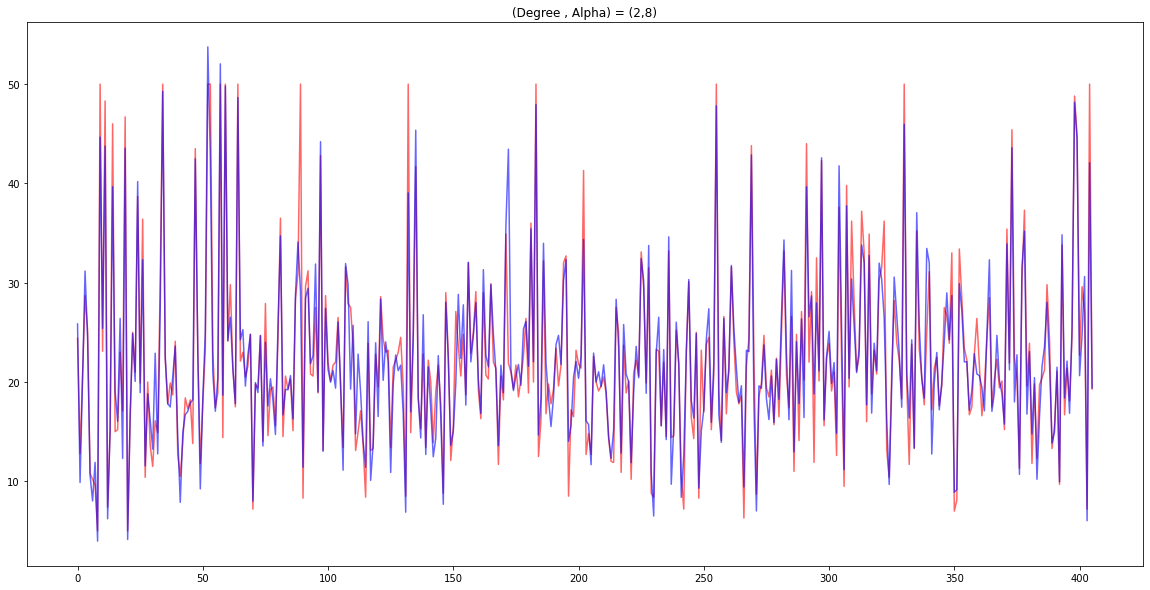

In [ ]:
fig = plt.figure(figsize =(20, 10))
plt.plot(y_train, 'r', label='Y',alpha=0.6)
plt.plot(pr, 'b', label='Y_pred',alpha=0.6)
plt.title("(Degree , Alpha) = (2,8)")

In [ ]:
X_test_std  = std_scale.transform(X_test)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_test = poly_features.fit_transform(X_test_std)

In [ ]:
y_test_prediction = reg_best.predict(X_poly_test)

In [ ]:
np.savetxt("prediction.csv", y_test_prediction, delimiter=",")